In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SigmoidLayer:
    def __init__(self, R, S, alfa):
        self.W = np.random.uniform(-1, 1, S*(R+1)).reshape((S, R+1))
        #self.W = np.array([[0.5, -0.5, -1.0]])
        self.alfa = alfa
        
    def train(self, X, T):
        
        bias = -np.ones((np.shape(X)[0], 1))
        X_a = np.concatenate([X, bias], axis = 1)
        print(f"x shape: {np.shape(X)}")
        
        E = 1.0
        last_E = 1.0
        counter_same_error = 0
        
        epoch = 0
        while(E > 0.02 and counter_same_error < 10):
        #for i in range(100):
            last_E = E
            E = 0
            for x, t in zip(X_a, T):
                
                Y = 1/(1 + np.exp(-np.matmul(self.W, x)))
                delta =  Y - t
                dy_dw = np.multiply(Y, ((np.ones(np.shape(T)[1])-Y)))
                dy_dp = np.multiply(dy_dw, delta)
                delta_p = -self.alfa*np.matmul(dy_dp[:, None], np.transpose(x[:, None]))
                self.W += delta_p
                E += (1/2)*(delta*delta)
                
            E /= np.shape(X)[0]
            print(f"E = {E}")
            if(abs(last_E - E) < 0.000001):
                counter_same_error += 1
            else:
                counter_same_error = 0
                    
    def classify(self, x):
        x_a = np.concatenate([x, [-1]])
        Y = 1/(1 + np.exp(-np.matmul(self.W, x_a)))
        return Y

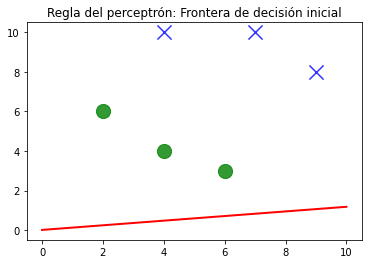

Before: [[-0.08830965  0.75600902  0.01044724]]
x shape: (6, 2)
E = [0.18523978]
E = [0.20223008]
E = [0.25526095]
E = [0.24714109]
E = [0.24516827]
E = [0.23852757]
E = [0.24012114]
E = [0.2436532]
E = [0.23128698]
E = [0.16146725]
E = [0.20265571]
E = [0.23244623]
E = [0.16497193]
E = [0.19451498]
E = [0.24346166]
E = [0.23051602]
E = [0.16305521]
E = [0.1699412]
E = [0.23092856]
E = [0.1648592]
E = [0.15994732]
E = [0.16192594]
E = [0.16433917]
E = [0.19450935]
E = [0.15791035]
E = [0.20375988]
E = [0.20527199]
E = [0.20318225]
E = [0.20099036]
E = [0.20488185]
E = [0.18423838]
E = [0.17971222]
E = [0.22994965]
E = [0.16814297]
E = [0.16283374]
E = [0.15968427]
E = [0.17712307]
E = [0.22152885]
E = [0.16318303]
E = [0.16060937]
E = [0.1605033]
E = [0.16248092]
E = [0.1591667]
E = [0.18768876]
E = [0.22265183]
E = [0.16414584]
E = [0.16237074]
E = [0.15907166]
E = [0.18906698]
E = [0.21584408]
E = [0.1622134]
E = [0.15882306]
E = [0.19421105]
E = [0.19811791]
E = [0.15855068]
E = [0.

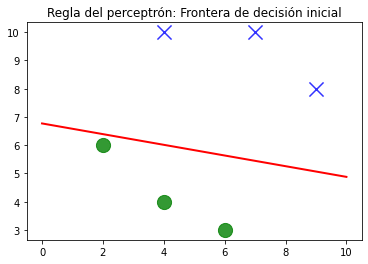

In [2]:
#X = [[0, 0], [0, 1], [1, 0], [1, 1]]
#T = [[-1], [1], [1], [1]]

X = np.array([[2.0, 6.0], [4.0, 4.0], [6.0, 3.0], [4.0, 10.0], [7.0, 10.0], [9.0, 8.0]])
T = np.array([[0.0], [0.0], [0.0], [1.0], [1.0], [1.0]])

sigmoid_1 = SigmoidLayer(np.shape(X)[1], np.shape(T)[1], 0.7)

x1 = np.linspace(0, 10)
x2 = (sigmoid_1.W[0, 2] / sigmoid_1.W[0, 1]) - (x1 * sigmoid_1.W[0, 0] / sigmoid_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

print(f"Before: {sigmoid_1.W}")
sigmoid_1.train(X, T)
print(f"After: {sigmoid_1.W}")

x2 = (sigmoid_1.W[0, 2] / sigmoid_1.W[0, 1]) - (x1 * sigmoid_1.W[0, 0] / sigmoid_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()

Result class for [5 5]: [0.26118983]
Result class for [6 8]: [0.95175782]


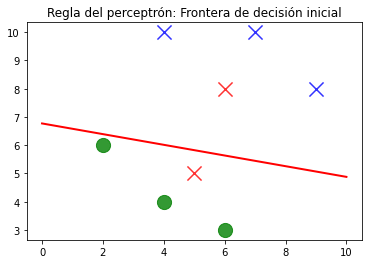

In [3]:
test_data = np.array([[5, 5], [6, 8]])

for i in range(np.shape(test_data)[0]):
    pattern_class = sigmoid_1.classify(test_data[i])
    print(f"Result class for {test_data[i]}: {pattern_class}")
    
    if pattern_class <= 0:
        plt.scatter(test_data[i][0], test_data[i][1], color = 'r', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(test_data[i][0], test_data[i][1], color = 'r', s = 200, marker = 'x', alpha = 0.8)    
    

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)    
    
x2 = (sigmoid_1.W[0, 2] / sigmoid_1.W[0, 1]) - (x1 * sigmoid_1.W[0, 0] / sigmoid_1.W[0, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)    
    
plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()  